In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("../../data/train/train.csv")

In [46]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,version_Remix,version_type_encoded,decade,decade_range,energy_danceability_valence,acoustic_intensity,popularity_energy_ratio,valence_energy_dif,decade_label,popularity_normalized
0,1xUJ1mdLAysxNBtO9w3J2g,Stompin At The Savoy,['Benny Goodman'],195533,1/1/90,1990,0.836,0.5250,0.222,0.079900,...,0,1,1990,90s-00s,0.075175,-9.250340,225.215080,0.4230,2,0.370632
1,62fX8EW16l8St2yL8rMer9,In My Room - Remastered,['The Beach Boys'],134133,9/16/63,1963,0.184,0.3410,0.416,0.000063,...,0,2,1960,50s-60s,0.070786,-1.761616,129.804572,0.0830,0,2.548527
2,0vTrXo9zLWib36Us8BQ4sN,State Of Independence - Single Version,['Jon & Vangelis'],262107,1/1/84,1984,0.148,0.7520,0.652,0.045500,...,0,1,1980,70s-80s,0.428526,-1.941760,59.815034,0.2220,1,0.272035
3,23IoCDFHoz1uM5XELOSg1U,Chandni Raaten Pyar Ki Baaten,"['Hemant Kumar', 'Lata Mangeshkar']",208973,12/1/52,1952,0.990,0.3110,0.253,0.000156,...,0,1,1950,50s-60s,0.033204,-11.814660,43.476542,0.1690,0,-0.478555
4,5ZrtPphrWFzzamKn3jSnv9,"Adagio for Strings, Op. 11","['Samuel Barber', 'Philadelphia Orchestra', 'E...",463347,1955,1955,0.910,0.0626,0.129,0.780000,...,0,1,1950,50s-60s,0.000281,-19.532240,302.302147,-0.0942,0,1.492568


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95958 entries, 0 to 95957
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           95958 non-null  object 
 1   name                         95958 non-null  object 
 2   artists                      95958 non-null  object 
 3   duration_ms                  95958 non-null  int64  
 4   release_date                 95958 non-null  object 
 5   year                         95958 non-null  int64  
 6   acousticness                 95958 non-null  float64
 7   danceability                 95958 non-null  float64
 8   energy                       95958 non-null  float64
 9   instrumentalness             95958 non-null  float64
 10  liveness                     95958 non-null  float64
 11  loudness                     95958 non-null  float64
 12  speechiness                  95958 non-null  float64
 13  tempo           

In [48]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade', 'decade_range',
       'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'decade_label',
       'popularity_normalized'],
      dtype='object')

### Red Neuronal

In [49]:
X = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'popularity_normalized']]
y = df['decade_label']

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76766, 21)
(19192, 21)
(76766,)
(19192,)


In [52]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train_categorical: {y_train_categorical.shape}")

Forma de X_train: (76766, 21)
Forma de y_train_categorical: (76766, 3)


In [53]:
model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),  
    Dropout(0.3),             
    Dense(32, activation='relu'),   
    Dense(y_train_categorical.shape[1], activation='softmax')
])

In [54]:
model_1.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

model_1.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,251 (51.76 KB)

 Trainable params: 13,251 (51.76 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model_1.fit(
    X_train, y_train_categorical,
    validation_split=0.2,
    epochs=50, 
    batch_size=32, 
    verbose=1)

Epoch 1/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6175 - loss: 0.8346 - val_accuracy: 0.6744 - val_loss: 0.7371
Epoch 2/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6771 - loss: 0.7355 - val_accuracy: 0.6847 - val_loss: 0.7151
Epoch 3/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6838 - loss: 0.7222 - val_accuracy: 0.6909 - val_loss: 0.7040
Epoch 4/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6911 - loss: 0.7073 - val_accuracy: 0.6945 - val_loss: 0.7018
Epoch 5/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6983 - loss: 0.6960 - val_accuracy: 0.6936 - val_loss: 0.6939
Epoch 6/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7046 - loss: 0.6792 - val_accuracy: 0.7029 - val_loss: 0.6857
Epoch 7/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7070 - loss: 0.6704 - val_accuracy: 0.7102 - val_loss: 0.6658
Epoch 8/50
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7119 - loss: 0.6501 - 

In [56]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test_categorical, verbose=0)

print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print(f"Pérdida en el conjunto de prueba: {test_loss}")

Accuracy en el conjunto de prueba: 0.9770216941833496
Pérdida en el conjunto de prueba: 0.07429278641939163


In [57]:
y_pred = model_1.predict(X_test)
y_pred_clas = np.argmax(y_pred, axis=1)
y_test_clas = np.argmax(y_test_categorical, axis=1)

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [58]:
print("\nReporte de clasificación:")
print(classification_report(y_test_clas, y_pred_clas))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test_clas, y_pred_clas))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6442
           1       0.96      0.97      0.97      6345
           2       0.97      0.97      0.97      6405

    accuracy                           0.98     19192
   macro avg       0.98      0.98      0.98     19192
weighted avg       0.98      0.98      0.98     19192


Matriz de confusión:
[[6348   84   10]
 [  17 6171  157]
 [   3  170 6232]]


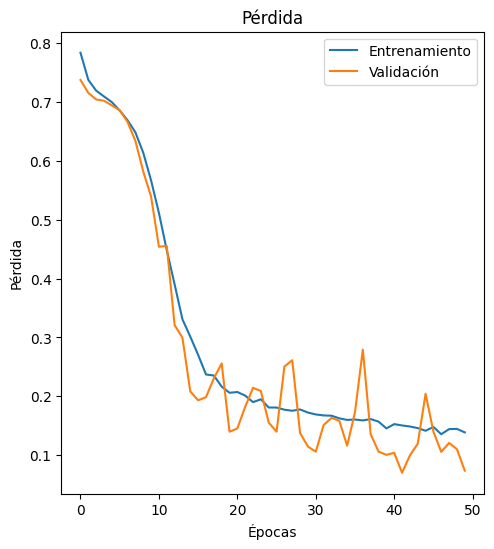

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

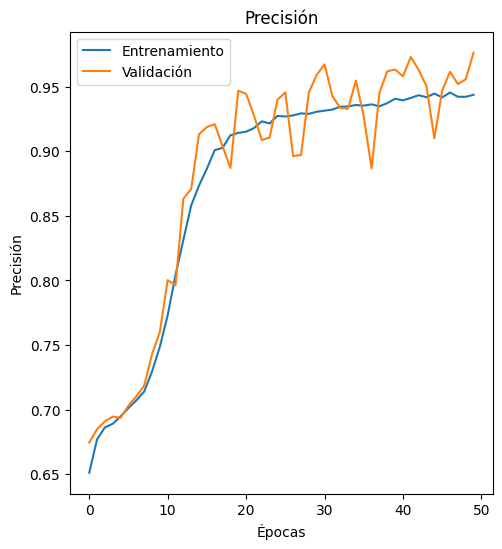

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

<mark>**Conclusiones:**</mark> El modelo funciona muy bien con un accuracy del 96%. La clase 1 (70s-80s) tiene un rendimiento ligeramente inferior, con mayor confusión con la clase 2 (90s-00s).

En cuanto a la representación, la curva es suave y muestra una mejora constante hasta estabilizarse cerca de 0.95. Esto indica que el modelo está aprendiendo correctamente del conjunto de entrenamiento. De forma similar ocurre en la representación de la pérdida, donde la estabilidad en ambas curvas y la convergencia entre las pérdidas de entrenamiento y validación son signos de un modelo bien entrenado.

### Ajuste de modelo: 30 épocas

In [61]:
X_2 = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'popularity_normalized']]
y_2 = df['decade_label']

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_2, test_size=0.2, random_state=42)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train_categorical: {y_train_categorical.shape}")


Forma de X_train: (76766, 21)
Forma de y_train_categorical: (76766, 3)


In [63]:
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),  
    Dropout(0.3),             
    Dense(32, activation='relu'),   
    Dense(y_train_categorical.shape[1], activation='softmax')
])


model_2.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])


history = model_2.fit(
    X_train, y_train_categorical,
    validation_split=0.2,
    epochs=30, 
    batch_size=32, 
    verbose=1)

Epoch 1/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6144 - loss: 0.8336 - val_accuracy: 0.6798 - val_loss: 0.7272
Epoch 2/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6771 - loss: 0.7398 - val_accuracy: 0.6854 - val_loss: 0.7172
Epoch 3/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6833 - loss: 0.7226 - val_accuracy: 0.6904 - val_loss: 0.7089
Epoch 4/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6910 - loss: 0.7092 - val_accuracy: 0.6922 - val_loss: 0.6963
Epoch 5/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6967 - loss: 0.6972 - val_accuracy: 0.7001 - val_loss: 0.6859
Epoch 6/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6949 - loss: 0.6927 - val_accuracy: 0.7031 - val_loss: 0.6810
Epoch 7/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7015 - loss: 0.6835 - val_accuracy: 0.7082 - val_loss: 0.6642
Epoch 8/30
1920/1920 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7112 - loss: 0.6602 - 

In [64]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test_categorical, verbose=0)

print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print(f"Pérdida en el conjunto de prueba: {test_loss}")

Accuracy en el conjunto de prueba: 0.9137661457061768
Pérdida en el conjunto de prueba: 0.20650795102119446


In [65]:
y_pred = model_2.predict(X_test)
y_pred_clas = np.argmax(y_pred, axis=1)
y_test_clas = np.argmax(y_test_categorical, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_test_clas, y_pred_clas))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test_clas, y_pred_clas))

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6442
           1       0.84      0.93      0.88      6345
           2       0.93      0.86      0.89      6405

    accuracy                           0.91     19192
   macro avg       0.92      0.91      0.91     19192
weighted avg       0.92      0.91      0.91     19192


Matriz de confusión:
[[6113  245   84]
 [  79 5930  336]
 [   4  907 5494]]


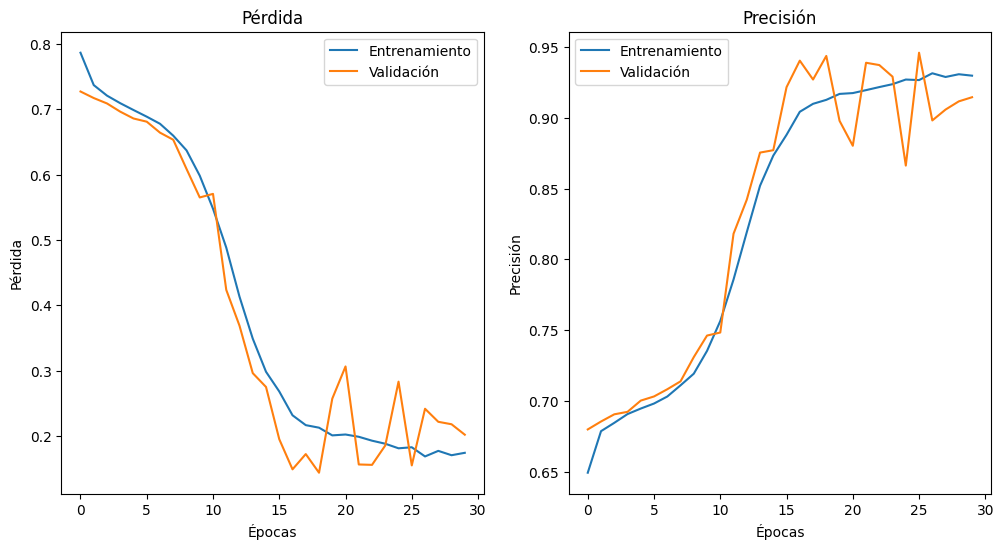

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()